In [ ]:
## Enable horizontal scroll in shell outputs (optional)
from IPython.display import display, HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

# [InterCom](https://github.com/Tecnologias-multimedia/intercom): a [Real-Time](https://en.wikipedia.org/wiki/Real-time) [Digital Audio](https://en.wikipedia.org/wiki/Digital_audio) [Full-Duplex](https://en.wikipedia.org/wiki/Duplex_(telecommunications)#FULL-DUPLEX) [Transmitter/Receiver](https://en.wikipedia.org/w/index.php?title=Data_transmission&redirect=no)

## Contents

1. What is InterCom?
2. Hiding the jitter.
3. Compression with DEFLATE.
4. A simple bit-rate control through quantization.
5. Removing intra-frame redundancy.
6. Removing intra-channel redundancy.
7. Perceptual coding.
8. Next improvements.

## 1. What is InterCom?

* InterCom is a [full-duplex](https://en.wikipedia.org/wiki/Duplex_(telecommunications)#FULL-DUPLEX) real-time [intercommunicator](https://en.wikipedia.org/wiki/Intercom) for digital ([PCM](https://en.wikipedia.org/wiki/Pulse-code_modulation)) audio, that uses Internet.

### A [minimal](https://tecnologias-multimedia.github.io/study_guide/minimal/) implementation

* In [`minimal.py`](https://github.com/Tecnologias-multimedia/InterCom/blob/master/src/minimal.py), the sender (of audio) splits a sequence of [frames](https://python-sounddevice.readthedocs.io/en/0.3.12/api.html) (two [stereo](https://en.wikipedia.org/wiki/Stereophonic_sound) [samples](https://en.wikipedia.org/wiki/Sampling_(signal_processing))) in chunks (of constant length) and each one is transmitted in an [UDP](https://en.wikipedia.org/wiki/User_Datagram_Protocol) packet. At the receiver, the sequence of frames is reconstructed and played.

        +-------------------------+                    +-------------------------+
        | Host A                  |                    | Host B                  |
        |  +----------+           |                    |           +----------+  |
        |  | InterCom |    +------+    +----------+    +------+    | InterCom |  |
        |  | process  |<-->| 4444 |<-->| Internet |<-->| 4444 |<-->| process  |  |
        |  +----------+    +------+    +----------+    +------+    +----------+  |
        |                         |                    |                         |
        +-------------------------+                    +-------------------------+

* By default, our intercom sends the audio from the port 4444 to the port 4444 in the localhost (Host A == Host B), resulting in that we play the audio that we have recorded.

#### In a terminal, run:
    sudo tcpdump -i lo

<p style="padding: 10px; border: 2px solid blue;"><font color='red'>Before running the next cell, please, check the mic and the speakers gains!</font><p>

In [ ]:
# Run this cell if you are using a real machine, which mic
!python ~/InterCom/src/minimal.py --show_stats -t 5

(INFO) minimal: A minimal InterCom (no compression, no quantization, no transform, ... only provides a bidirectional (full-duplex) transmission of raw (playable) chunks. 
(INFO) minimal: NUMBER_OF_CHANNELS = 2
(INFO) minimal: chunk_time = 0.023219954648526078 seconds
(INFO) minimal: seconds_per_cycle = 1
(INFO) minimal: chunks_per_cycle = 43.06640625
(INFO) minimal: frames_per_cycle = 44100

InterCom parameters:

Namespace(destination_address='localhost', destination_port=4444, filename=None, frames_per_chunk=1024, frames_per_second=44100, input_device=None, list_devices=False, listening_port=4444, output_device=None, reading_time=5, show_samples=False, show_stats=True)

Using device:

  0 Intel 82801AA-ICH: - (hw:0,0), ALSA (2 in, 0 out)
  1 Intel 82801AA-ICH: MIC ADC (hw:0,1), ALSA (2 in, 0 out)
  2 sysdefault, ALSA (128 in, 0 out)
  3 samplerate, ALSA (128 in, 0 out)
  4 speexrate, ALSA (128 in, 0 out)
  5 pulse, ALSA (32 in, 32 out)
  6 upmix, ALSA (8 in, 0 out)
  7 vdownmix, ALSA 

   27       0       0       0       0    0   58
Avgs:       0       0       2       2    0   68
cycle  mesgs.  mesgs.    KBPS    KBPS %CPU %CPU
         sent   recv.    sent    recv.   Global

   28       0       0       0       0    0   70
Avgs:       0       0       2       2    0   68
cycle  mesgs.  mesgs.    KBPS    KBPS %CPU %CPU
         sent   recv.    sent    recv.   Global

   29       0       0       0       0    0   41
Avgs:       0       0       2       2    0   67
cycle  mesgs.  mesgs.    KBPS    KBPS %CPU %CPU
         sent   recv.    sent    recv.   Global

   30       0       0       0       0    0   65
Avgs:       0       0       1       1    0   67
cycle  mesgs.  mesgs.    KBPS    KBPS %CPU %CPU
         sent   recv.    sent    recv.   Global

   31       0       0       0       0    0   12
Avgs:       0       0       1       1    0   65
cycle  mesgs.  mesgs.    KBPS    KBPS %CPU %CPU
         sent   recv.    sent    recv.   Global

   32       0       0       0      

   60       0       0       0       0    0   75
Avgs:       0       0       0       0    0   61
cycle  mesgs.  mesgs.    KBPS    KBPS %CPU %CPU
         sent   recv.    sent    recv.   Global

   61       0       0       0       0    0   77
Avgs:       0       0       0       0    0   62
cycle  mesgs.  mesgs.    KBPS    KBPS %CPU %CPU
         sent   recv.    sent    recv.   Global

   62       0       0       0       0    0   40
Avgs:       0       0       0       0    0   61
cycle  mesgs.  mesgs.    KBPS    KBPS %CPU %CPU
         sent   recv.    sent    recv.   Global

   63       0       0       0       0    0   52
Avgs:       0       0       0       0    0   61
cycle  mesgs.  mesgs.    KBPS    KBPS %CPU %CPU
         sent   recv.    sent    recv.   Global

   64       0       0       0       0    0   67
Avgs:       0       0       0       0    0   61
cycle  mesgs.  mesgs.    KBPS    KBPS %CPU %CPU
         sent   recv.    sent    recv.   Global

   65       0       0       0      

In [ ]:
# Run this cell if you are using a real machine, but the mic does not work
!python ~/InterCom/src/minimal.py --show_stats -t 5 -f ~/InterCom/data/AviadorDro_LaZonaFantasma.oga

In [ ]:
# Run this cell if you are using a virtual machine or very old real one
!python ~/InterCom/src/minimal.py --show_stats -t 5 -s 8000 -f ~/InterCom/data/AviadorDro_LaZonaFantasma_8000Hz.oga --frames_per_chunk 256

## 2. [Hiding](https://tecnologias-multimedia.github.io/study_guide/latency/) the [packet jitter](https://en.wikipedia.org/wiki/Packet_delay_variation)

* The communication network (Internet) usually delays a random amount of time the transmission of the chunks, i.e., generates a jitter (packet delay variation during the transmission of a sequence of packets).

* This jitter can be hiden through the [buffering](https://tecnologias-multimedia.github.io/study_guide/buffering/) (delaying) of the received chunks, before playing them.

![With and without buffering](https://tecnologias-multimedia.github.io/study_guide/latency/graphics/timelines.svg)
<!-- ![With and without buffering](/home/vruiz/timelines.svg)
![With and without buffering](./tmp/timelines.svg)
![With and without buffering](../../../timelines.svg) -->

* The buffer size depends on the user's preferences (the larger the buffer, the lower the number of lost chunks).

### Measuring the jitter in my host

In [ ]:
!ping -c 3 localhost

![RTT and ping](https://tecnologias-multimedia.github.io/study_guide/latency/graphics/ping_timeline.svg)
$t_t =$ Transmission Time, $t_p =$ Propagation Time

* The `min/avg/max/mdev` represents the minimum [RTT](https://en.wikipedia.org/wiki/Round-trip_delay) / average RTT / maximum RTT / standard deviation of the RTT.
* Latency is the RTT divided by 2.

![RTT and ping](https://tecnologias-multimedia.github.io/study_guide/latency/graphics/ping_timeline.svg)
<center>$t_t =$ Transmission Time, $t_p =$ Propagation Time</center>

* Usually, the jitter that we want to hide is the `mdev`/2.
* Unfortunately, `localhost` is too good to simulate typical transmissions scenarios :-/

### How is the jitter in the Internet?

In [ ]:
!ping -c 3 8.8.8.8 # Google DNS

* If we want to simulate a real scenario using `localhost` then we need to add some random latency.

### Increase latency and jitter for the `localhost` link
* Using [`tc`](https://man7.org/linux/man-pages/man8/tc.8.html) (Traffic Control).
* Example with:
    * Average latency = 20 ms (average RTT = 40 ms).
    * Average `mdev` = 5 ms.
    * [Perarson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between delays = 0.25 (1.0 means total [correlation](https://en.wikipedia.org/wiki/Correlation) between consecutive transmissions, 0.0 implies no correlation).
    * Statistical distribution of the RTTs = [normal](https://en.wikipedia.org/wiki/Normal_distribution).

<p style="padding: 10px; border: 2px solid blue;"><font color='red'>Please, before running the next cell, be sure that sudo does NOT request a password (open a terminal and run, for example, "sudo ls"). If a password is required, add the line "your_username ALL=(ALL) NOPASSWD: ALL" (for example) at the end of the "/etc/sudoers" file.</font><p>

<p style="padding: 10px; border: 2px solid blue;"><font color='red'>You must be aware that the modification of the latency/throughput of the `localhost` adapter affect also to the refresing time of this notebook! Please, be patient.</font><p>

In [ ]:
avg_latency = 300
mean_deviation = 50
correlation = 25
distribution = "normal"

# Activate tc rules
!tc qdisc show dev lo
!sudo tc qdisc add dev lo root handle 1: netem delay {avg_latency}ms {mean_deviation}ms {correlation}% distribution {distribution}

# Show rules    
!tc qdisc show dev lo

# See the effect
!ping -c 3 localhost

# Remove rules
!sudo tc qdisc del dev lo root
!tc qdisc show dev lo

# See the effect
!ping -c 3 localhost

### Let's listen again to minimal
... using a high jitter.

In [ ]:
# Real machine

avg_latency = 300
mean_deviation = 50
correlation = 25
distribution = "normal"

!tc qdisc show dev lo
!sudo tc qdisc add dev lo root handle 1: netem delay {avg_latency}ms {mean_deviation}ms {correlation}% distribution {distribution}
!tc qdisc show dev lo

#!python ~/InterCom/src/minimal.py --show_stats -t 5
!python ~/InterCom/src/minimal.py --show_stats -t 5 -f ~/InterCom/data/AviadorDro_LaZonaFantasma.oga

!sudo tc qdisc del dev lo root
!tc qdisc show dev lo

In [ ]:
# Virtual machine

avg_latency = 300
mean_deviation = 50
correlation = 25
distribution = "normal"

!tc qdisc show dev lo
!sudo tc qdisc add dev lo root handle 1: netem delay {avg_latency}ms {mean_deviation}ms {correlation}% distribution {distribution}
!tc qdisc show dev lo

#!python ~/InterCom/src/minimal.py --show_stats -t 5
#!python ~/InterCom/src/minimal.py --show_stats -t 5 --frames_per_second 8000 #--frames_per_chunk 256
#!python ~/InterCom/src/minimal.py --show_stats -t 5 -f ~/InterCom/data/AviadorDro_LaZonaFantasma.oga #--frames_per_second 8000
!python ~/InterCom/src/minimal.py --show_stats -t 5 -s 8000 -f ~/InterCom/data/AviadorDro_LaZonaFantasma_8000Hz.oga --frames_per_chunk 256

!sudo tc qdisc del dev lo root
!tc qdisc show dev lo

### Quite bad :-/ The chunks are not arriving with a constant cadence to the receiver
* (left: the problem, right: a solution)

![Buffering](https://tecnologias-multimedia.github.io/study_guide/latency/graphics/timelines.svg)

### Let's hidden the jitter
* The default buffering time in InterCom is 150 ms (see `buffer.py -h`).

In [ ]:
# Real machine

avg_latency = 300
mean_deviation = 50
correlation = 25
distribution = "normal"

!tc qdisc show dev lo
!sudo tc qdisc add dev lo root handle 1: netem delay {avg_latency}ms {mean_deviation}ms {correlation}% distribution {distribution}
!tc qdisc show dev lo

!ping -c 3 localhost

#!python ~/InterCom/src/buffer.py --show_stats -t 5
!python ~/InterCom/src/buffer.py --show_stats -B 300 -t 5 -f ~/InterCom/data/AviadorDro_LaZonaFantasma.oga

# Remove rules
!sudo tc qdisc del dev lo root
!tc qdisc show dev lo

In [ ]:
# Virtual machine

avg_latency = 300
mean_deviation = 50
correlation = 25
distribution = "normal"

!tc qdisc show dev lo
!sudo tc qdisc add dev lo root handle 1: netem delay {avg_latency}ms {mean_deviation}ms {correlation}% distribution {distribution}
!tc qdisc show dev lo

!ping -c 3 localhost

!python ~/InterCom/src/buffer.py --show_stats -b 300 -t 5 -s 8000 -f ~/InterCom/data/AviadorDro_LaZonaFantasma_8000Hz.oga --frames_per_chunk 256

!sudo tc qdisc del dev lo root
!tc qdisc show dev lo

### Much better!

## 3. [Compression with DEFLATE](https://tecnologias-multimedia.github.io/study_guide/BR_control/#x1-40001.2)
* But the jitter "accomodation" is not enought for some real environments.

### Estimation of the [throughput](https://en.wikipedia.org/wiki/Throughput) of the `localhost` link

* Notice that the following technique depends heavily on the packet size, that using ping is limited to 64 KB (including the IP header). For this reason, our results will be only approximated :-/

In [ ]:
!ping -c 1 -s 65507 localhost > /tmp/1
!cat /tmp/1
!grep rtt /tmp/1 | cut -f 5 -d "/" > /tmp/2
f = open("/tmp/2")
time = f.read()
print("transmission time =", time)
print("GBPS =", 65507*8/float(time)/2/1000/1000)

* Too high! We need harder conditions for testing InterCom that without compression requires

\begin{equation}
\frac{44100\frac{\text{frames}}{\text{second}}\times 2\frac{\text{samples}}{\text{frame}}\times 2\frac{\text{bytes}}{\text{sample}}\times 8\frac{\text{bits}}{\text{byte}}}{1000} = 1411.2 ~\text{kbps} \approx 1.4~\text{Mbps}
\end{equation}

### The effect of limiting the throughput

In [ ]:
avg_latency = 10
mean_deviation = 10
correlation = 50
distribution = "normal"
throughput = 300 # KBPS

# Modify the latency and the throughput
!sudo tc qdisc add dev lo root handle 1: netem delay {avg_latency}ms {mean_deviation}ms {correlation}% distribution {distribution}
!sudo tc qdisc add dev lo parent 1:1 handle 10: tbf rate {throughput}kbit burst 1024kbit limit 1024kbit

# Measure throughput
!ping -c 1 -s 65507 localhost > /tmp/1
!cat /tmp/1
!grep rtt /tmp/1 | cut -f 5 -d "/" > /tmp/2
f = open("/tmp/2")
time = f.read()
print(time)

# Delete the rules
!sudo tc qdisc del dev lo parent 1:1 handle 10:
!sudo tc qdisc del dev lo root
!tc qdisc show dev lo

print("Throughput =", 65507*8/float(time)/2, "KBPS")

* Well, the limit of the throughput for a burst transmission is not effective, but for a sequence of chunks yes, it is.

###   Let's see the effect of the throughput limit

In [ ]:
# Real machine

avg_latency = 10
mean_deviation = 10
correlation = 50
distribution = "normal"
throughput = 300 # KBPS

!sudo tc qdisc add dev lo root handle 1: netem delay {avg_latency}ms {mean_deviation}ms {correlation}% distribution {distribution}
!sudo tc qdisc add dev lo parent 1:1 handle 10: tbf rate {throughput}kbit burst 64kbit limit 64kbit

!python ~/InterCom/src/buffer.py --show_stats -t 5 -f ~/InterCom/data/AviadorDro_LaZonaFantasma.oga

!sudo tc qdisc del dev lo parent 1:1 handle 10:
!sudo tc qdisc del dev lo root
!tc qdisc show dev lo

In [ ]:
# Virtual machine

avg_latency = 10
mean_deviation = 10
correlation = 50
distribution = "normal"
throughput = 300 # KBPS

!sudo tc qdisc add dev lo root handle 1: netem delay {avg_latency}ms {mean_deviation}ms {correlation}% distribution {distribution}
!sudo tc qdisc add dev lo parent 1:1 handle 10: tbf rate {throughput}kbit burst 64kbit limit 64kbit

!python ~/InterCom/src/buffer.py --show_stats -t 5 -s 8000 -f ~/InterCom/data/AviadorDro_LaZonaFantasma_8000Hz.oga --frames_per_chunk 256

!sudo tc qdisc del dev lo parent 1:1 handle 10:
!sudo tc qdisc del dev lo root
!tc qdisc show dev lo

### Depending on the link's thoughput and the bit-rate of the audio ...
... a part of the chunk are not transmitted, because the link is congested :-/

### [DEFLATE](https://en.wikipedia.org/wiki/DEFLATE) can mitigate the problem

* The chunks can be compressed with [LZSS](https://en.wikipedia.org/wiki/Lempel-Ziv-Storer-Szymanski), that is based on [LZ77](https://github.com/vicente-gonzalez-ruiz/LZ77) and [Huffman Coding](https://vicente-gonzalez-ruiz.github.io/Huffman_coding/).

* We have choosen this text compressor codec because:
    1. It's fast.
    2. Works well when repeated strings are found at the input.
    3. Available in [The Standard Python Library](https://docs.python.org/3/library/) ([zlib](https://docs.python.org/3/library/zlib.html)).
    4. Generic (eats anything).

In [ ]:
# Real machine

avg_latency = 10
mean_deviation = 10
correlation = 50
distribution = "normal"
throughput = 300 # KBPS

!sudo tc qdisc add dev lo root handle 1: netem delay {avg_latency}ms {mean_deviation}ms {correlation}% distribution {distribution}
!sudo tc qdisc add dev lo parent 1:1 handle 10: tbf rate {throughput}kbit burst 64kbit limit 64kbit

!python ~/InterCom/src/DEFLATE_byteplanes2.py --show_stats -t 5 -f ~/InterCom/data/AviadorDro_LaZonaFantasma.oga

!sudo tc qdisc del dev lo parent 1:1 handle 10:
!sudo tc qdisc del dev lo root
!tc qdisc show dev lo

In [ ]:
# Virtual machine

avg_latency = 10
mean_deviation = 10
correlation = 50
distribution = "normal"
throughput = 300 # KBPS

!sudo tc qdisc add dev lo root handle 1: netem delay {avg_latency}ms {mean_deviation}ms {correlation}% distribution {distribution}
!sudo tc qdisc add dev lo parent 1:1 handle 10: tbf rate {throughput}kbit burst 64kbit limit 64kbit

!python ~/InterCom/src/DEFLATE_byteplanes2.py --show_stats -t 5 -s 8000 -f ~/InterCom/data/AviadorDro_LaZonaFantasma_8000Hz.oga --frames_per_chunk 256

!sudo tc qdisc del dev lo parent 1:1 handle 10:
!sudo tc qdisc del dev lo root
!tc qdisc show dev lo

* Notice that still a part of chunks are still lost.

###  In general, DEFLATE is not enough :-/ We need to compress more!

## 4. A simple [bit-rate "control"](https://tecnologias-multimedia.github.io/study_guide/BR_control/#x1-60001.4) through [quantization](https://tecnologias-multimedia.github.io/study_guide/BR_control/#x1-50001.3) (and DEFLATE)

* Quantization removes the less relevant information (mainly [electronic noise](https://en.wikipedia.org/wiki/Noise_(electronics)) if the quantization step size is small) and helps to increase the [compression ratio](https://en.wikipedia.org/wiki/Compression_ratio).
* In lossy signal compression, [dead-zone quantizers](https://github.com/vicente-gonzalez-ruiz/quantization/blob/master/digital_quantization.ipynb) are commonly used because they tend to generate 0's that like to entropy compressors.
* This class of quantizers can also operate by bit-planes when $\Delta$ is a power of 2.

* We use the quantizer
\begin{equation}
  k = \text{sgn}(x) \max\left(0, \left\lfloor \frac{\left| x \right|}{\Delta} + \frac{1}{2}\right\rfloor\right),
\end{equation}
where $k$ is the quantization index, and $\Delta$ is the quantization step size. The dequantizer is defined by:
\begin{equation}
  y = \Delta k.
\end{equation}

In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import math
import numpy as np
import sounddevice as sd
from scipy import signal

In [ ]:
def quantizer(x, quantization_step):
    k = (x / quantization_step).astype(np.int16)
    return k

def dequantizer(k, quantization_step):
    y = quantization_step * k
    return y

In [ ]:
def plot(x, y, xlabel='', ylabel='', title=''):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.grid()
    ax.xaxis.set_label_text(xlabel)
    ax.yaxis.set_label_text(ylabel)
    ax.plot(x, y)
    plt.show(block=False)

In [ ]:
x = np.linspace(-8, 8, 500) # Input samples
k2 = quantizer(x, quantization_step = 2)
y2 = dequantizer(k2, quantization_step = 2)
k3 = quantizer(x, quantization_step = 3)
y3 = dequantizer(k3, quantization_step = 3)

In [ ]:
plot(x, y2, "Input Sample", "Reconstructed Sample", "Dead-zone Quantizer ($\Delta={}$)".format(2))
plot(x, y3, "Input Sample", "Reconstructed Sample", "Dead-zone Quantizer ($\Delta={}$)".format(3))

In [ ]:
def q_deq(x, quantization_step):
    k = quantizer(x, quantization_step)
    y = dequantizer(k, quantization_step)
    return k, y

In [ ]:
x = np.arange(start = -8, stop = 9, step = 1)
k, y = q_deq(x, quantization_step = 3)
print("    Original samples =", x)
print("Quantization indexes =", k)
print(" Dequantized samples =", y)

* In InterCom, we loosely "control" the bit-rate because a strict bit-rate control through the variation of $\Delta$ is computationally intensive (we must determine the [Rate/Distortion curve](https://en.wikipedia.org/wiki/Rate%E2%80%93distortion_theory) of the current chunk to find $\Delta$ before to quantize, compress and send it) and it's hard to compute in real-time.

* For this reason, the current implementation estimates the number of lost chunks per second (in the last second) and use this information to increase or decrease $\Delta$ for the chunks (of the next second, by default).

In [ ]:
# Run this cell if you have a mic
sampling_rate = 44100
duration = 5.0  # seconds
x = sd.rec(int(duration * sampling_rate), samplerate=sampling_rate, channels=1, dtype=np.int16)
print("Speak!")
while sd.wait():
    pass
print("done")

In [ ]:
# Run this cell if you don't have a mic
import soundfile
x, sampling_rate = soundfile.read("/home/tm/InterCom/data/AviadorDro_LaZonaFantasma.oga")
x = x[0:65536*2] * 32768
x = x.astype(np.int16)

In [ ]:
sd.play(x)
plot(np.linspace(0, len(x)-1, len(x)), x, "Sample", "Amplitude", "Original Signal")

In [ ]:
quantization_step = 2048
k, y = q_deq(x, quantization_step)
sd.play(y)
plot(np.linspace(0, len(y)-1, len(y)), y, "Sample", "Amplitude", "Quantized Signal ($\Delta={}$)".format(quantization_step))

In [10]:
def average_energy(x):
    return np.sum(x.astype(np.double)*x.astype(np.double))/len(x)

def RMSE(x, y):
    error_signal = x - y
    return math.sqrt(average_energy(error_signal))

def entropy_in_bits_per_symbol(sequence_of_symbols):
    value, counts = np.unique(sequence_of_symbols, return_counts = True)
    probs = counts / len(sequence_of_symbols)
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    entropy = 0.
    for i in probs:
        entropy -= i * math.log(i, 2)

    return entropy

def RD_curve(x):
    points = []
    for q_step in range(128, 4096, 128):
        k, y = q_deq(x, q_step)
        #print(np.unique(k))
        rate = entropy_in_bits_per_symbol(k)
        distortion = RMSE(x, y)
        points.append((rate, distortion))
    return points

In [ ]:
RD_points = RD_curve(x)

In [ ]:
plt.title("RD Tradeoff")
plt.xlabel("Estimated Bits per Sample")
plt.ylabel("RMSE")
plt.scatter(*zip(*RD_points), s=2, c='b', marker="o")
plt.show()

### Let's listen to the effect of a bit-rate control algorithm

The quantizer is controlled by the following algorithm:

1. Every second (by default) run:
  \begin{equation}
    \left\{
    \begin{array}{ll}
      \Delta = 2\Delta & \quad\text{if}~L>2 \\
      \Delta = \frac{10}{11}\Delta & \quad\text{always}.
    \end{array}
    \right.
  \end{equation}
 where $L$ is the number of lost chunks in the previus "bit-rate control period" of time.

In [ ]:
# Real machine

avg_latency = 10
mean_deviation = 10
correlation = 50
distribution = "normal"
throughput = 300 # KBPS

!sudo tc qdisc add dev lo root handle 1: netem delay {avg_latency}ms {mean_deviation}ms {correlation}% distribution {distribution}
!sudo tc qdisc add dev lo parent 1:1 handle 10: tbf rate {throughput}kbit burst 64kbit limit 64kbit

!python ~/InterCom/src/BR_control_conservative.py --show_stats -t 20 -f ~/InterCom/data/AviadorDro_LaZonaFantasma.oga

!sudo tc qdisc del dev lo parent 1:1 handle 10:
!sudo tc qdisc del dev lo root
!tc qdisc show dev lo

In [ ]:
# Virtual machine

avg_latency = 10
mean_deviation = 10
correlation = 50
distribution = "normal"
throughput = 300 # KBPS

!sudo tc qdisc add dev lo root handle 1: netem delay {avg_latency}ms {mean_deviation}ms {correlation}% distribution {distribution}
!sudo tc qdisc add dev lo parent 1:1 handle 10: tbf rate {throughput}kbit burst 64kbit limit 64kbit

!python ~/InterCom/src/BR_control_conservative.py --rate_control_period 2 --show_stats -s 8000 -t 20 -f ~/InterCom/data/AviadorDro_LaZonaFantasma_8000Hz.oga --frames_per_chunk 256

!sudo tc qdisc del dev lo parent 1:1 handle 10:
!sudo tc qdisc del dev lo root
!tc qdisc show dev lo

### Some conclusions

1. The transmission should have a smaller number of lost chunks compared to not using BR-control.
2. Probably some extra technique should be applied to have a larger "useful" range of the quantization step size.

## 5. [Removing intra-frame (inter-channel or spatial) redundancy](https://tecnologias-multimedia.github.io/study_guide/transform_coding/#x1-30001.1)

* Transform Coding increases the dynamic range of the coefficients and therefore, the "useful" range of the quantization step size.

### The MST (Mid/Side Transform)
The samples of a (stereo) frame tend to have similar amplitudes. For this reason, we apply [Mid/Side stereo coding](https://en.wikipedia.org/wiki/Joint_encoding#M/S_stereo_coding) (before quantization).

* The MST (Mid/Side Transform) analysis transform
\begin{equation}
  \mathbf{w} = \mathbf{K}\mathbf{x} = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\mathbf{x},
  \label{eq:forward_transform_matrix_form}
\end{equation}
that can be also written as
\begin{equation}
  \begin{bmatrix}
    \mathbf{w}_0 \\
    \mathbf{w}_1
  \end{bmatrix}
  = 
  \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
  \begin{bmatrix}
    \mathbf{x}_0 \\
    \mathbf{x}_1
  \end{bmatrix}, \tag{1}
\end{equation}
where $\mathbf{x}$ is a stereo frame, $\mathbf{K}$ is the (forward or analysis)
transform matrix and $\mathbf{w}=\begin{bmatrix} \mathbf{w}_0 & \mathbf{w}_1\end{bmatrix}^{\text
  T}$ is the corresponding [decomposition](https://en.wikipedia.org/wiki/Discrete_wavelet_transform#Example_in_image_processing).
  
* The synthesis transform is
\begin{equation}
  \mathbf{x} = \mathbf{K}^{-1}\mathbf{w}
  \label{eq:inverse_transform}
\end{equation}
can be found from Eq. (1), where we
get that
\begin{equation}
  \begin{array}{rcl}
  \mathbf{w}_0 & = & \mathbf{x}_0 + \mathbf{x}_1\\
  \mathbf{w}_1 & = & \mathbf{x}_0 - \mathbf{x}_1.
  \end{array}
\end{equation}
By solving $\mathbf{x}_0$ (adding) and $\mathbf{x}_1$ (substracting) in
these equations, we obtain that
\begin{equation}
  \begin{array}{rcl}
  \mathbf{x}_0 & = & \frac{1}{2}(\mathbf{w}_0 + \mathbf{w}_1)\\
  \mathbf{x}_1 & = & \frac{1}{2}(\mathbf{w}_0 - \mathbf{w}_1),
  \end{array}
\end{equation}
that in matrix form becomes
\begin{equation}
  \begin{bmatrix}
    \mathbf{x}_0 \\
    \mathbf{x}_1
  \end{bmatrix}
  = \frac{1}{2}
  \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
  \begin{bmatrix}
    \mathbf{w}_0 \\
    \mathbf{w}_1
  \end{bmatrix}.
\end{equation}

Therefore,
\begin{equation}
  \mathbf{x} = \mathbf{K}^{-1}\mathbf{w} = \frac{1}{2}\mathbf{K}^{\text T}\mathbf{w} = \frac{1}{2}\mathbf{K}\mathbf{w} = \frac{1}{2}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\mathbf{w}.
  \label{eq:inverse_transform_matrix_form}
\end{equation}

In [ ]:
def plot(y, xlabel='', ylabel='', title=''):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.grid()
    ax.xaxis.set_label_text(xlabel)
    ax.yaxis.set_label_text(ylabel)
    x = np.linspace(0, len(y)-1, len(y))
    ax.plot(x, y, '.', markersize=1)
    plt.show(block=False)

In [ ]:
# Run this cell if you have a mic
fs = 44100      # Sampling frequency
duration = 5.0  # seconds
x = sd.rec(int(duration * fs), samplerate=fs, channels=2, dtype=np.int16)
print("Say something!")
while sd.wait():
    pass
print("done")

In [4]:
# Run this cell if you don't have a mic
import soundfile
x, sampling_rate = soundfile.read("/home/tm/InterCom/data/AviadorDro_LaZonaFantasma.oga")
x = x[0:65536*2] * 32768
x = x.astype(np.int16)

LibsndfileError: Error opening '/home/tm/InterCom/data/AviadorDro_LaZonaFantasma.oga': System error.

In [ ]:
plot(x, "Sample", "Amplitude", "Audio Signal")
#x = x[65536:]
x = x[:65536] # The Dyadic DWT works better when the number of samples is a power of 2
plot(x, "Sample", "Amplitude", "Audio Signal")
sd.play(x)

In [3]:
def MST_analyze(x):
    w = np.empty_like(x, dtype=np.int32)
    w[:, 0] = x[:, 0].astype(np.int32) + x[:, 1] # L(ow frequency subband)
    w[:, 1] = x[:, 0].astype(np.int32) - x[:, 1] # H(igh frequency subband)
    return w

def MST_synthesize(w):
    x = np.empty_like(w, dtype=np.int16)
    x[:, 0] = (w[:, 0] + w[:, 1])/2 # L(ow frequency subband)
    x[:, 1] = (w[:, 0] - w[:, 1])/2 # H(igh frequency subband)
    return x

In [ ]:
w = MST_analyze(x)

In [ ]:
plot(w[:, 0], "Sample", "Amplitude", "Mid Subband")
sd.play(w[:, 0].astype(np.int16))

In [ ]:
plot(w[:, 1], "Sample", "Amplitude", "Side Subband")
sd.play(w[:, 1].astype(np.int16))

In [2]:
K1 = np.array([1.0, 1.0])
w1, h1 = signal.freqz(K1, fs=44100)
K2 = np.array([1.0, -1.0])
w2, h2 = signal.freqz(K2, fs=44100)

NameError: name 'np' is not defined

In [ ]:
plt.subplot(211)
plt.title('Mid/Side analysis filters transfer functions')
plt.plot(w1, 20 * np.log10(abs(h1)), 'b')
plt.ylabel('Amplitude [dB]')
plt.subplot(212)
plt.plot(w2, 20 * np.log10(abs(h2)), 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude [dB]')
plt.show()

* Notice that both filters have the same gain, although with only 2 taps, the filtering performance is not very high :-/

### Quantization of the MST subbands

In [ ]:
def quantizer(x, quantization_step):
    '''Deadzone quantization.'''
    k = (x / quantization_step).astype(np.int32)
    return k

def q_RD_curve(data):
    '''RD curve in the space domain.'''
    RD_points = []
    for q_step in range(16, 1024, 32):
        k, y = q_deq(data, q_step)
        rate = entropy_in_bits_per_symbol(k[:, 0]) + entropy_in_bits_per_symbol(k[:, 1])
        distortion = RMSE(data, y)
        RD_points.append((rate, distortion))
    return RD_points

def MST_RD_curve(data):
    '''RD curve in the MST domain.'''
    RD_points = []
    for q_step in range(16, 1024, 32):
        analyzed_data = MST_analyze(data)
        k, y = q_deq(analyzed_data, q_step)
        rate = entropy_in_bits_per_symbol(k[:, 0]) + entropy_in_bits_per_symbol(k[:, 1])
        reconstructed_data = MST_synthesize(y)
        distortion = RMSE(data, reconstructed_data)
        RD_points.append((rate, distortion))
    return RD_points

In [ ]:
q_RD_points = q_RD_curve(x)
MST_RD_points = MST_RD_curve(x)

In [ ]:
plt.title("RD Tradeoff")
plt.xlabel("Estimated Bits per Sample")
plt.ylabel("RMSE")
plt.plot(*zip(*MST_RD_points), c='b', marker=".", label='Using MST')
plt.plot(*zip(*q_RD_points), c='r', marker=".", label='Only quantization')
plt.legend(loc='upper right')
plt.show()

### Conclusions

1. As it can be seen, the distortion is an exponential function (with a negative exponent). This basically implies that when the bit-rate decreases ($\Delta$ increases), the distortion also increases exponentially. Therefore, when we have two (or more) signals that are quantized, it is more beneficial from the a RD point of view, to increase $\Delta$ by $x/2$ in both subbands, than $x$ in only one of them.

2. Notice that the quantization pattern $\Delta_0==\Delta_1$ is only a heuristic that works fine in most of situations, and that generates the same amount of distortion in the amplitude of the audio signal and the stereo information. To determine the optimal value of the QSSs, we should always solve for the option that is the most beneficial, based on the eal RD curve.

3. Since both subbands ($\mathbf{w}_0$ and $\mathbf{w}_1$) have the same gain, and in general, the quantization error is independent of the signal (for low enough $\Delta$ values), in theory the quantization pattern $\Delta_0==\Delta_1$ should yield an acceptable DR performance, because we are generating the same amount of quantization error in both subbands, for a given bit-rate.

4. You can get more insights about the optimal quantization in the MST domain in his [notebook](https://github.com/Tecnologias-multimedia/Tecnologias-multimedia.github.io/blob/master/study_guide/transform_coding/stereo_transforms_RD.ipynb).

### Result of aplying the MST to InterCom

In [ ]:
# Real machine
!python ~/InterCom/src/stereo_MST_coding_16.py --show_stats -t 20 -f ~/InterCom/data/AviadorDro_LaZonaFantasma.oga

In [ ]:
# Virtual machine
!python ~/InterCom/src/stereo_MST_coding_16.py --show_stats -s 8000 -t 20 -f ~/InterCom/data/AviadorDro_LaZonaFantasma_8000Hz.oga --frames_per_chunk 256

## 6. [Removing intra-channel (inter-frame or temporal) redundancy](https://tecnologias-multimedia.github.io/study_guide/transform_coding/#x1-80001.2)

* The samples of each channel exhibit temporal redundancy. Therefore, we use a [dyadic](https://en.wikipedia.org/wiki/Discrete_wavelet_transform) [Discrete Wavelet Transform (DWT)](https://tecnologias-multimedia.github.io/study_guide/temporal_decorrelation/) to exploit it (before quantization).
* See [here](https://cseweb.ucsd.edu/classes/fa17/cse166-a/lec13.pdf) some Wavelet functions.

### [Implementation of the DWT with Perfect Reconstruction Filter Banks](https://tecnologias-multimedia.github.io/study_guide/transform_coding/#x1-80001.2)

* The DWT can be implemented as a cascade of 2-channels PRFBs:
$~$
![DWT](https://tecnologias-multimedia.github.io/study_guide/transform_coding/graphics/cascade.svg)
$$~$$
where $l$ stands for low-frequency subband, and $h$ for high-frequency subband. $\downarrow 2$ represents a subsampling of one of each two samples, and $\uparrow 2$ the insertion of a 0 where the downsampler discarded a sample.

* Depending on how
$\phi$ (the **analysis scaling function** (low-pass frequency analysis filter)),
$\psi$ (the **analysis wavelet function** (high-pass frequency analysis filter),
$\tilde\phi$ (the **synthesis scaling function** (low-pass frequency synthesis filter),
and $\tilde\psi$ the **synthesis wavelet function** (high-pass frequency synthesis filter))
are defined, a different DWT is computed.

### [Implementation of the DWT with Lifting](https://tecnologias-multimedia.github.io/study_guide/transform_coding/#x1-80001.2)
####  Example with linear interpolation

\begin{equation}
  {\mathbf h}^l_i = {\mathbf l}^{l-1}_{2i+1} - \frac{1}{2}({\mathbf l}^{l-1}_{2i} + {\mathbf l}^{l-1}_{2i+2})
\end{equation}
\begin{equation}
  {\mathbf l}^l_i = {\mathbf l}^{l-1}_{2i} + \frac{1}{4}({\mathbf h}^l_{i-1} + {\mathbf h}^l_i),
\end{equation}

We avoid the use of the decimators, dividing by 2 the number of operations.

### Theoretical [Spectral resolution](https://tecnologias-multimedia.github.io/study_guide/transform_coding/#x1-80001.2) provided by the dyadic DWT

* The DWT generates the dyadic decomposition (for $2^l$ samples, where $l$ is the number of levels of the DWT):
 \begin{equation*}
    | \mathbf{l}^s_0 | \mathbf{h}^s_0 | \mathbf{h}^{s-1}_0 \mathbf{h}^{s-1}_1 | \mathbf{h}^{s-2}_0 \mathbf{h}^{s-2}_1 \mathbf{h}^{s-2}_2 \mathbf{h}^{s-2}_3 | \cdots | \mathbf{h}^1_0 \mathbf{h}^1_1 \cdots \mathbf{h}^1_{2^{n-1}-1} |,
  \end{equation*}
where $s$ represents the subband index ($s$), and each subband contains a set of
coefficients (distinguished by subscript).

* It holds that:
\begin{equation}
  W({\mathbf h}^s) = \frac{1}{2}W({\mathbf h}^{s-1}),
\end{equation}
and that:
\begin{equation}
  W({\mathbf l}^{N_{\text{levels}}}) = W({\mathbf h}^{N_{\text{levels}}}),
\end{equation}
being $W(\cdot)$ the bandwidth of the corresponding
subband $s$.

### A real example:

In [8]:
def average_complex_energy(x):
    return np.sum(x.real.astype(np.double)*x.real.astype(np.double) +
                  x.imag.astype(np.double)*x.imag.astype(np.double))/len(x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

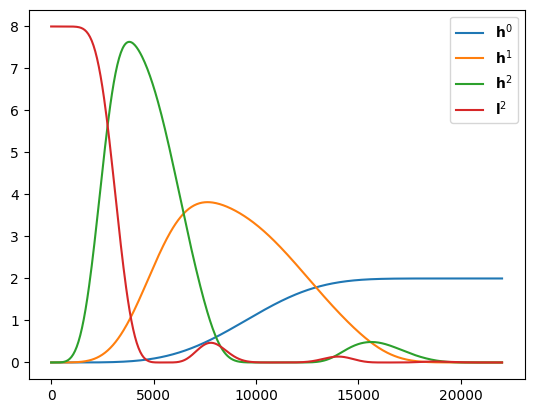

In [11]:
import pywt # pip install pywavelets
from IPython.display import Math

%matplotlib inline

#filters_name = "haar"
filters_name = "db5"
#filters_name = "db7"
#filters_name = "db11"
#filters_name = "db20"
#filters_name = "bior3.5"

wavelet = pywt.Wavelet(filters_name)

N_levels = 3

for l in range(N_levels):
    filters = wavelet.wavefun(level = (l+1))[:-1]
    w0, h0 = signal.freqz(filters[0], fs=44100)
    w1, h1 = signal.freqz(filters[1], fs=44100)
    plt.plot(w1, abs(h1), label="$\\mathbf{h}$" + f"$^{l}$")
    display(Math("\\text{Average energy of}~" + "\mathbf{h}" + f"^{l}" + f" = {average_complex_energy(h1)}"))
plt.plot(w0, abs(h0), label="$\\mathbf{l}$" + f"$^{l}$")
display(Math("\\text{Average energy of}~" + "\mathbf{l}" + f"^{l}" + f" = {average_complex_energy(h0)}"))
plt.legend(loc="best")
plt.show()

### Quantization in the (Dyadic) DWT domain

* As it can be seen, if the DWT is orthogonal, then
\begin{equation}
  |(\mathbf{h}^s)|^² = \frac{1}{2}|\mathbf{h}^{s-1}|^2,
\end{equation}
and
\begin{equation}
  |\mathbf{l}^s|^2 = |\mathbf{h}^s|^2,
\end{equation}
where $|\cdot|^2$ is the L$^2$ energy of the corresponding subband. Therefore
(considering also the bandwidth of each subband), it holds that all the subbands
have the same gain.

* This is the same situation as in the MST (but with more subbands). For this reason,
all the DWT coefficients are quantized using the same $\Delta$. You can get extra
information in this [notebook](https://github.com/Tecnologias-multimedia/Tecnologias-multimedia.github.io/blob/master/study_guide/transform_coding/DWT_RD.ipynb).

### (Dyadic) DWT in action
Go to the shell and run:
```
python ~/InterCom/test/sounddevice/plot_input_stereo.py &
python ~/InterCom/test/transforms/rfft_hamming.py &
python ~/InterCom/test/transforms/dwt5.py &
python ~/InterCom/test/sounddevice/play_sine.py 440
```

### DWT RD performance

In [1]:
def quantizer(x, quantization_step):
    k = (x / quantization_step).astype(np.int32)
    return k

def dequantizer(k, quantization_step):
    y = quantization_step * k
    return y

def DWT_analyze(x, levels):
    coefs = np.empty(x.shape, dtype=np.int32)
    decomposition_0 = pywt.wavedec(x[:, 0], wavelet=wavelet, level=levels, mode="per")
    decomposition_1 = pywt.wavedec(x[:, 1], wavelet=wavelet, level=levels, mode="per")
    coefs_0, slices = pywt.coeffs_to_array(decomposition_0)
    coefs_1, slices = pywt.coeffs_to_array(decomposition_1)
    coefs[:, 0] = np.rint(coefs_0).astype(np.int32)
    coefs[:, 1] = np.rint(coefs_1).astype(np.int32)
    return coefs, slices

def DWT_synthesize(coefs, slices):
    samples = np.empty(coefs.shape, dtype=np.int32)
    decomposition_0 = pywt.array_to_coeffs(coefs[:, 0], slices, output_format="wavedec")
    decomposition_1 = pywt.array_to_coeffs(coefs[:, 1], slices, output_format="wavedec")
    samples[:, 0] = np.rint(pywt.waverec(decomposition_0, wavelet=wavelet, mode="per")).astype(np.int32)
    samples[:, 1] = np.rint(pywt.waverec(decomposition_1, wavelet=wavelet, mode="per")).astype(np.int32)
    return samples

def DWT_RD_curve(data, levels):
    RD_points = []
    for q_step in range(16, 1024, 32):
        MST_coefs = MST_analyze(data)
        DWT_coefs, slices = DWT_analyze(MST_coefs, levels)
        k, y = q_deq(DWT_coefs, q_step)
        rate = entropy_in_bits_per_symbol(k[:, 0]) + entropy_in_bits_per_symbol(k[:, 1])
        MST_coefs = DWT_synthesize(y, slices)
        reconstructed_data = MST_synthesize(MST_coefs)
        distortion = RMSE(data, reconstructed_data)
        RD_points.append((rate, distortion))
    return RD_points

In [2]:
x = x[:65536]
plot(x, "Sample", "Amplitude", "")
sd.play(x.astype(np.int16))

NameError: name 'x' is not defined

In [ ]:
q_RD_points = q_RD_curve(x)
MST_RD_points = MST_RD_curve(x)
DWT_RD_points = DWT_RD_curve(x, levels = N_levels)

In [3]:
plt.title("RD Tradeoff")
plt.xlabel("Estimated Bits per Sample")
plt.ylabel("RMSE")
plt.plot(*zip(*q_RD_points), c='r', marker=".", label='Only quantization')
plt.plot(*zip(*MST_RD_points), c='b', marker=".", label='Using MST')
plt.plot(*zip(*DWT_RD_points), c='g', marker=".", label=f'Using MST+DWT(levels={N_levels})')
plt.legend(loc='upper right')
plt.show()

NameError: name 'plt' is not defined

### [Overlapped processing]()

#### The problem
![3 chunks](https://tecnologias-multimedia.github.io/study_guide/transform_coding/3_chunks.svg)
![original reconstruction](https://tecnologias-multimedia.github.io/study_guide/transform_coding/without.svg)
![extended](https://tecnologias-multimedia.github.io/study_guide/transform_coding/extended.svg)
![improved reconstruction](https://tecnologias-multimedia.github.io/study_guide/transform_coding/reconstructed.svg)

#### A solution
![Overlapping betweem chunks](https://tecnologias-multimedia.github.io/study_guide/transform_coding/graphics/overlapping.svg)

### Result of applying the DWT to InterCom

In [ ]:
# Real machine
!python ~/InterCom/src/temporal_overlapped_DWT_coding.py --show_stats -t 20 -f ~/InterCom/data/AviadorDro_LaZonaFantasma.oga

In [ ]:
# Virtual machine
!python ~/InterCom/src/temporal_overlapped_DWT_coding.py --show_stats -s 8000 -t 20 -f ~/InterCom/data/AviadorDro_LaZonaFantasma_8000Hz.oga --frames_per_chunk 256

## 7. [Perceptual]((https://en.wikipedia.org/wiki/Psychoacoustics)) Coding

### Frequency resolution provided by the (Dyadic) DWT vs the [Threshold of (Human) Hearing (ToH)](https://tecnologias-multimedia.github.io/study_guide/threshold_of_hearing/)

NameError: name 'pywt' is not defined

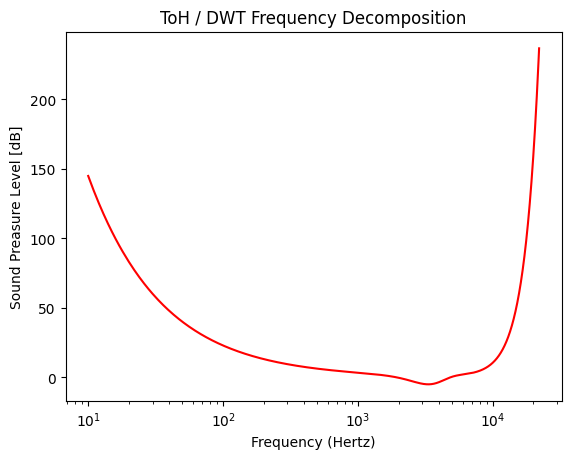

In [4]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(10,22050,22050)
y = 3.64*(x/1000)**(-0.8) - 6.5*np.exp((-0.6)*(x/1000-3.3)**2) + 1E-3*(x/1000)**4
plt.xscale("log")
plt.yscale("linear")
plt.title("ToH / DWT Frequency Decomposition")
plt.xlabel("Frequency (Hertz)")
plt.ylabel("Sound Preasure Level [dB]")
plt.plot(x, y, c='r', label="ToH")

wavelet = pywt.Wavelet("db5")

N_levels = 6

for l in range(N_levels):
    filters = wavelet.wavefun(level = (l+1))[:-1]
    w0, h0 = signal.freqz(filters[0], fs=44100)
    w1, h1 = signal.freqz(filters[1], fs=44100)
    plt.plot(w1, 100*abs(h1)/2**l, label="$\\mathbf{h}$" + f"$^{l}$", linestyle="dotted")
plt.plot(w0, 100*abs(h0)/2**(N_levels-1), label="$\\mathbf{l}$" + f"$^{l}$", linestyle="dotted")

plt.legend(loc='best')

plt.show()

* The QSSs are adapted to the ToH in each DWT subband.

### Result of applying the ToH to InterCom

In [ ]:
# Real machine
!python ~/InterCom/src/basic_ToH.py -q 512 --show_stats -t 20 -f ~/InterCom/data/AviadorDro_LaZonaFantasma.oga

In [ ]:
# Virtual machine
!python ~/InterCom/src/basic_ToH.py -q 512 --show_stats -s 8000 -t 20 -f ~/InterCom/data/AviadorDro_LaZonaFantasma_8000Hz.oga --frames_per_chunk 256

## 8. Future work
1. Use the [DFT (Discrete Fourier Transform)](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) to increase the frequency accuracy in each DWT subband.
2. Consider the [masking effects](https://en.wikipedia.org/wiki/Auditory_masking).
3. [Echo cancellation](https://en.wikipedia.org/wiki/Echo_suppression_and_cancellation).
4. [Video](https://en.wikipedia.org/wiki/Video)!

## Appendix

### Resumen

La transmisión en tiempo real de señales sobre redes de datos no dedicadas plantea problemas de latencia y de rendimiento. En este seminario se analizan las principales técnicas usadas para mitigar dichos problemas, y se evalúa su efectividad en InterCom (https://github.com/Tecnologias-multimedia/InterCom), una aplicación que permite la intercomunicación (mediante señales de audio) entre 2 usuarios conectados a Internet. Más información en https://github.com/Tecnologias-multimedia/InterCom/blob/master/docs/2-hours_seminar.ipynb.

The real-time transmission of signals over non-dedicated data networks generates latency and performance issues. In this seminar, the main techniques used to mitigate these problems are analyzed, and their effectiveness is evaluated in InterCom (https://github.com/Tecnologias-multimedia/InterCom), an application that allows intercommunication (through audio signals) between 2 users connected to the Internet. More information at https://github.com/Tecnologias-multimedia/InterCom/blob/master/docs/2-hours_seminar.ipynb.